In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.read_csv('Housing_group.csv')
df.head()   

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Med_income
0,0,-117.04,32.54,7,938,297.0,1187,282,1.2667,67500,NEAR OCEAN,12667
1,1,-117.04,32.55,15,2206,648.0,2511,648,1.6348,93200,NEAR OCEAN,16348
2,2,-117.06,32.55,5,3223,940.0,3284,854,1.4384,108800,NEAR OCEAN,14384
3,3,-117.09,32.55,8,6533,1217.0,4797,1177,3.9583,144400,NEAR OCEAN,39583
4,4,-117.05,32.56,18,1215,320.0,1195,349,1.9875,114900,NEAR OCEAN,19875


The exploration plots show many capped values, such as median_house_value (around 500.000), median_age and median_income


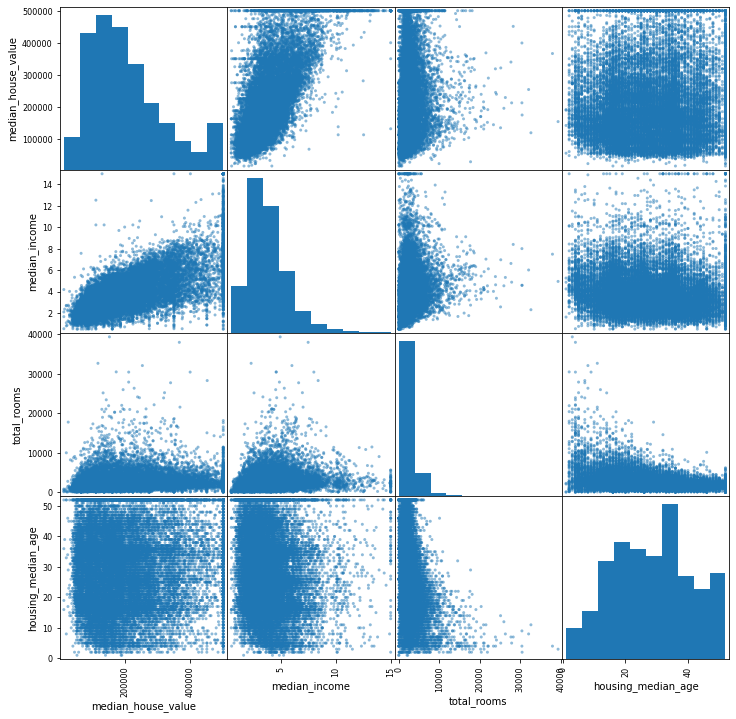

In [2]:
# David
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df[attributes], figsize=(12,12))

print('The exploration plots show many capped values, such as median_house_value (around 500.000), median_age and median_income')

In [4]:
df.describe()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Med_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,10319.500000,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,38706.710029
std,5958.399114,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,18998.217179
min,0.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,4999.000000
25%,5159.750000,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,25634.000000
50%,10319.500000,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,35348.000000
75%,15479.250000,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,47432.500000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,150001.000000


In [2]:
#Lawrence
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Med_income
id,1.000000,-0.888006,0.952796,0.045574,-0.027419,-0.054934,-0.092779,-0.058587,-0.080815,-0.129972,-0.080815
longitude,-0.888006,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.015176
latitude,0.952796,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.079809
housing_median_age,0.045574,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.119034
total_rooms,-0.027419,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.198050
total_bedrooms,-0.054934,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.007723
population,-0.092779,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.004834
households,-0.058587,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.013033
median_income,-0.080815,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,1.000000
median_house_value,-0.129972,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.688075
